<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/PlanetaryGear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Planetary Gear</h1></b>

Dr. Bingsen Wang

8/3/2024
</center>

#Python Code
The Python code illustrates a gear.

0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
0


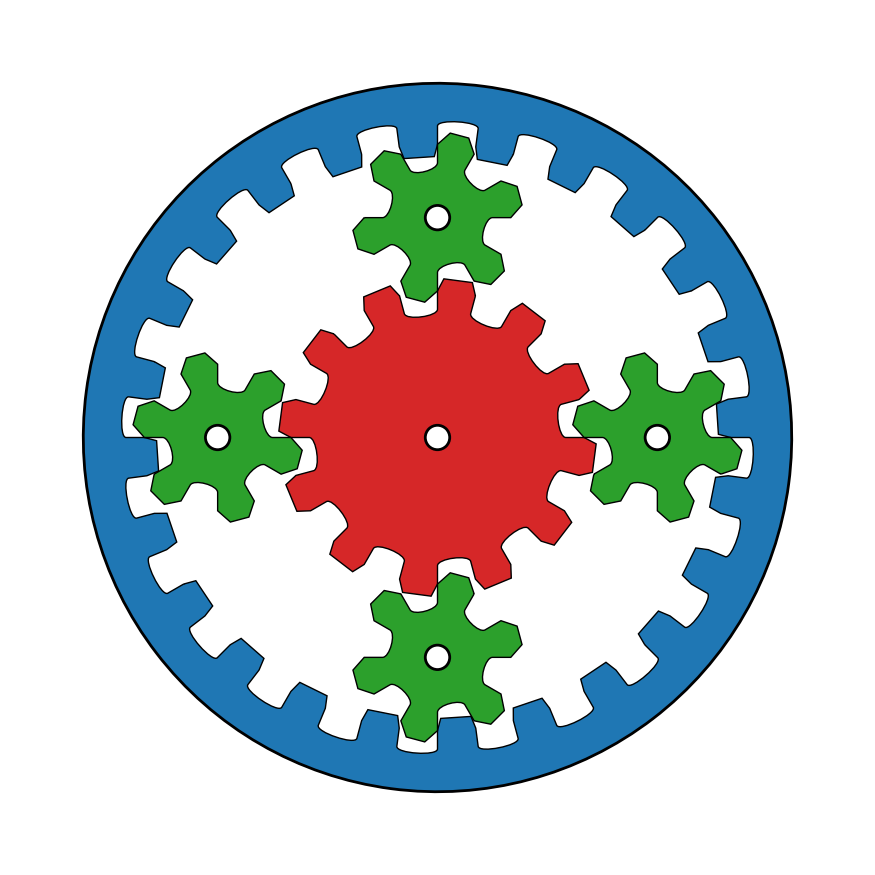

In [74]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,tan,pi,exp,angle,array,sqrt
from numpy import heaviside as hs
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arc
from matplotlib.collections import PathCollection as pc
from matplotlib.transforms import Affine2D
from matplotlib import animation,colors
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def axis_reset(ax): #clear axis for redrawing
  xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
  return

def draw_gear(ax,xy,z,m,alpha,theta,fc='w',ec='k'):
  ha,hf = .5*m, .75*m
  r,rf,ra = z*m/2,z*m/2-hf,z*m/2+ha
  verts,codes = [],[]
  angles = np.array([.5,.5,.5,0,0,0,-ha*tan(alpha)/ra,-.5+ha*tan(alpha)/ra,-.5])
  rs = np.array([r,rf,rf-hf*.4,rf-hf*.4,rf,r,ra,ra,r])
  for k in range(z):
    pts=exp(-1j*2*pi/z*k)*exp(1j*angles*2*pi/z)*rs
    verts += list(zip(pts.real,pts.imag))
    codes += [Path.LINETO]*2+[Path.CURVE4]*3+[Path.LINETO]*(len(pts)-5)
  t = Affine2D().rotate(theta).translate(*xy)+ax.transData #transform
  patch = PathPatch(Path(verts, [Path.MOVETO]+codes[1:]), fc=fc,
                    ec=ec,lw=1,transform=t)
  ax.add_patch(patch)
  ax.add_patch(mp.Circle((0,0),.1,fc='w',ec=ec,lw=2,transform=t))
  return

def draw_ring_gear(ax,z,m,alpha,theta,fc='w',ec='k'):
  ha,hf = .5*m, .75*m
  r,rf,ra = z*m/2,z*m/2+hf,z*m/2-ha
  verts,codes = [],[]
  angles = np.array([.5,.5,.5,0,0,0,-ha*tan(alpha)/ra,-.5+ha*tan(alpha)/ra,-.5])
  rs = np.array([r,rf,rf+hf*.4,rf+hf*.4,rf,r,ra,ra,r])
  for k in range(z):
    pts=exp(-1j*2*pi/z*k)*exp(1j*angles*2*pi/z)*rs
    verts += list(zip(pts.real,pts.imag))
    codes += [Path.LINETO]*2+[Path.CURVE4]*3+[Path.LINETO]*(len(pts)-5)
  t = Affine2D().rotate(theta-pi/z)+ax.transData #transform
  patch = PathPatch(Path(verts, [Path.MOVETO]+codes[1:]), fc='w',
                    ec=ec,lw=1,transform=t)
  ax.add_patch(mp.Circle((0,0),z*m/2+.5,fc=fc,ec=ec,lw=2,transform=t))
  ax.add_patch(patch)
  return

#parameters
Nfps = 450 #number of frames
t=linspace(0,1,Nfps)
m = .2 #module number, not to the ISO standard
alpha = 45/180*pi #pressure angle in rad
zp,zs,zr = 6,12,24 #teeth number of planet gear,sun gear and ring gear
da = m*(zp+zs)/2 #distance between gears

#plotting
xylim = [[-3.5,3.5] for _ in range(2)]
clst=['tab:red','tab:green','tab:purple','tab:orange','tab:blue','tab:brown','k','w'] #colors light bg
fig = plt.figure(figsize=(9,9))
ax = fig.add_axes((.025,.025,.95,.95),xlim=xylim[0],ylim=xylim[1],fc='none')

# animation function. This is called sequentially
def animate(i):
  if i%50==0: print(i)
  ii=int(i/Nfps)
  match ii:
    case 0: #planet gear spins only, no rotation around sun gear
      ws = 2*pi #sun gear angular speed
      wp_r = 0 #rotation speed of the planet gear center around sun gear
      wp = wp_r - (ws-wp_r)*zs/zp #angular speed of the planet gear
      wr = wp*zp/zr + wp_r*(zs+zp)/zr #angular speed of the ring gear
    case 1: #sun gear fixed
      ws = 0 #sun gear angular speed
      wp_r = 2*pi #rotation speed of the planet gear center around sun gear
      wp = wp_r - (ws-wp_r)*zs/zp #angular speed of the planet gear
      wr = wp*zp/zr + wp_r*(zs+zp)/zr #angular speed of the ring gear
    case 2: #ring gear fixed
      wr = 0 #ring gear angular speed
      wp_r = 2*pi #rotation speed of the planet gear center around sun gear
      wp = -wp_r*(1+zs/zp) #angular speed of the planet gear
      ws = wp_r + (wp_r-wp)*zp/zs #sun gear angular speed
  i = i%Nfps
  axis_reset(ax) #clear axis
  draw_ring_gear(ax,zr,m,alpha,wr*t[i],fc=clst[4]) #ring gear
  draw_gear(ax,(0,0),zs,m,alpha,ws*t[i],fc=clst[0]) #sun gear
  for k in range(4): #planet gears
    draw_gear(ax,(da*cos(wp_r*t[i]+k*pi/2),da*sin(wp_r*t[i]+k*pi/2)),zp,
              m,alpha,wp*t[i]+k*pi/2,fc=clst[1+ii])
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps*3)
anim.save("PlanetaryGear.mp4", writer=animation.FFMpegWriter(fps=30),dpi = 200)